## Lab 3
#### Authors: Amahury J. Lopez Diaz, Srikanth Iyer, Jessica Lasebikan

##### Problem 1. 
##### a) Write an elementary (homogeneous, 1-dimensional lattice, binary, 3-cell neighborhood) cellular-automata simulator, that computes & displays the time-evolution of any elementary CA from a given initial configuration. Assume that the edges of your CA fold around (toroid lattice). Use it to run Rule 126, starting from an initial condition where the whole lattice is in state 0 except for a single point in the middle cell which is in state 1 (other rules are exemplified in section 2.4.1 of Floreano and Mattiussi's book and all rules can be seen at Wolfram's MathWorld). Run it for 100 iterations. Produce a space-time diagram that looks like the one shown for rule 126.

##### b) Run the CA again, except now with a new rule (whichever one you like), and a random initial condition (the probability of each initial cell being on or off is 0.5). 
##### HINTS: You can use wxPython or pyCX to make your drawings.

In [1]:
import numpy as np

In [2]:
#Setting an initial state
rng = np.random.RandomState(42)
data = rng.randint(0, 2, 20)

In [3]:
data

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

##### To update the state of our cellular automaton we will need to define a set of rules. A given cell \(C\) only knows about the state of it’s left and right neighbors, labeled \(L\) and \(R\) respectively. We can define a function or rule, \(f(L, C, R)\), which maps the cell state to either 0 or 1.

In [4]:
#How to generate input triplets?
for i in range(8):
    print(np.binary_repr(i, 3))

000
001
010
011
100
101
110
111


##### For each input triplet, we can assign 0 or 1 to the output. 

##### The output of \(f\) is the value which will replace the current cell \(C\) in the next time step. In total there are \(2^{2^3} = 2^8 = 256\) possible rules for updating a cell. 

##### Stephen Wolfram introduced a naming convention, now known as the Wolfram Code, for the update rules in which each rule is represented by an 8 bit binary number.

In [5]:
#For example “Rule 30” could be constructed by first converting to binary and then building an array for each bit
rule_number = 30
rule_string = np.binary_repr(rule_number, 8)
rule = np.array([int(bit) for bit in rule_string])
print(rule)

[0 0 0 1 1 1 1 0]


In [6]:
# By convention the Wolfram code associates the leading bit with ‘111’ and the final bit with ‘000’.
# For rule 30 the relationship between the input, rule index and output is as follows:
for i in range(8):
    triplet = np.binary_repr(i, 3)
    print(f"input:{triplet}, index:{7-i}, output {rule[7-i]}")

input:000, index:7, output 0
input:001, index:6, output 1
input:010, index:5, output 1
input:011, index:4, output 1
input:100, index:3, output 1
input:101, index:2, output 0
input:110, index:1, output 0
input:111, index:0, output 0


##### We can define a function which maps the input cell information with the associated rule index. 

#### Essentially we are converting the binary input to decimal and adjusting the index range.

In [7]:
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4 * L + 2 * C + R)
    return int(index)

In [8]:
# Now we can take in any input and look up the output based on our rule, for example:
rule[rule_index((1, 0, 1))]

0

In [9]:
rule[rule_index((0, 1, 1))]

1

##### Finally, we can use Numpy to create a data structure containing all the triplets for our state array and apply the function across the appropriate axis to determine our new state.

In [10]:
all_triplets = np.stack([np.roll(data, 1), data, np.roll(data, -1)])
all_triplets

array([[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]])

In [11]:
new_data = rule[np.apply_along_axis(func1d=rule_index, axis=0, arr=all_triplets)]
print(new_data)

[1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1]


##### That is the process for a single update of our cellular automata. To do many updates and record the state over time, we will create a function.

In [12]:
def CA_run(initial_state, n_steps, rule_number):
    # Getting the triplet's assignment 
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])
    
    # Building an empty automaton
    m_cells = len(initial_state)
    CA_run = np.zeros((n_steps, m_cells))
    CA_run[0, :] = initial_state
    
    #Fillint out the automaton:
    for step in range(1, n_steps):
        all_triplets = np.stack(
            [
                np.roll(CA_run[step - 1, :], 1),
                CA_run[step - 1, :],
                np.roll(CA_run[step - 1, :], -1),
            ]
        )
        CA_run[step, :] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]

    return CA_run

In [13]:
initial = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1])
data = CA_run(initial, n_steps=10, rule_number=30)

In [14]:
data

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1., 1., 1., 0.]])

##### Problem 2: Implement the Boolean Network (BN) model of the mammalian cell cycle described in "Dynamical Analysis of a Generic Boolean Model for the Control of the Mammalian Cell Cycle", A. Faure, A. Naldi, C. Chaouiya, D. Thieffry, Bioinformatics, 2006, 22(14), pp. 124-131. PDF. 
##### a) Implement the transition logic for the 10-node BN described in Table 1 of the article (note that all the update functions that refer to the input as Ubc actually refer to UbcH10). The codewords under the column 'Product' are short for the regulatory molecules involved in the mammalian cell cycle. Run the network from an initial condition where the CycD node is set to OFF, and all other nodes are set to any state. Show that the fixed-state attractor reached is defined by: Rb = p27 = Cdh1 = ON, with all other nodes OFF. This state represents the quiescence state of the cell, as CycD is a key growth regulator; lack of it kills the cell cycle. Read the first 2 paragraphs of section 2.2 in the paper that explains this. Also, here is a sample program that implements a simple 2-node BN: BooleanNet.py

In [15]:
%run BooleanNet.py

[False, False] ===> [True, False]
[False, True] ===> [False, False]
[True, False] ===> [True, False]
[True, True] ===> [False, True]


##### b) Now set CycD node to ON. Using all possible combinations of states for the remanding nodes, create a state transition graph (STG) of this network (in other words, vertices in the STG represents all possible states of the network with CycD set to ON, and edges represent necessary transitions between these states). Plot this STG; note that this STG is not the same as the one shown on this webpage. You should see a 7-state cyclic attractor in your STG as shown in fig. 2 (bottom left) of the paper. To distinguish the attractor from the rest of the STG, write a piece of logic to identify it and then paint the nodes and edges involved in it using distinct colors. This attractor represents the active cell cycle, also explained in section 2.2 of the paper. To graph the STG, you will need to use a graph drawing library. A good one to use is the NetworkX library. For a sample piece of code on drawing a simple graph using this library, see BooleanNetSTG.py and DrawGraph.py.

[0, 1, 2, 3] [(0, 1), (1, 1), (2, 0), (3, 2)]


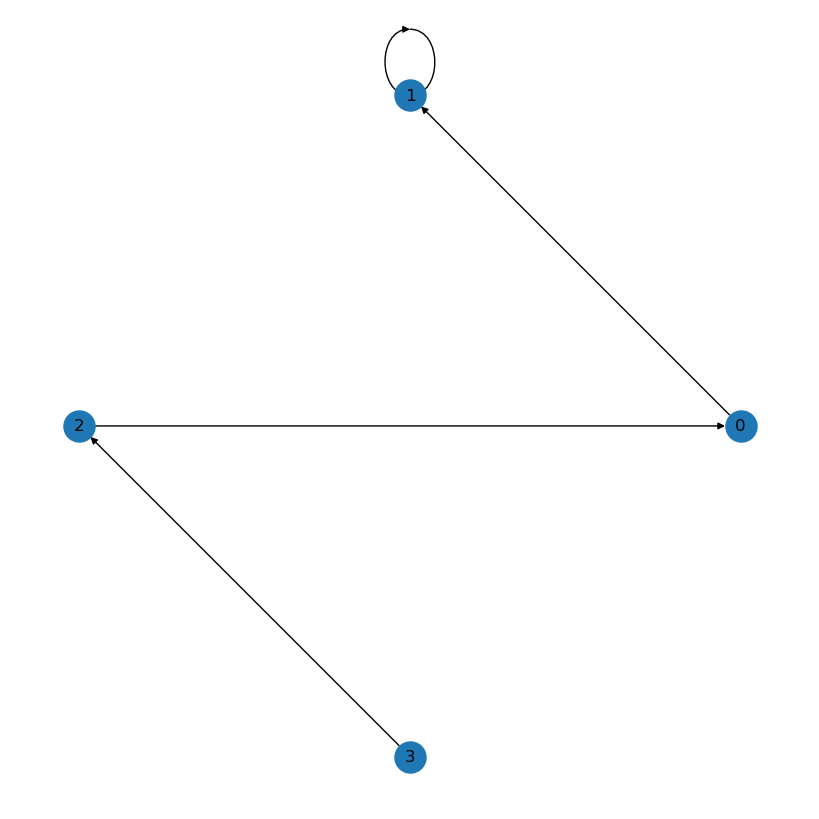

In [16]:
%run BooleanNetSTG.py

[1, 2, 3, 4, 5, 6] [(1, 2), (1, 3), (1, 5), (4, 5), (6, 5)]


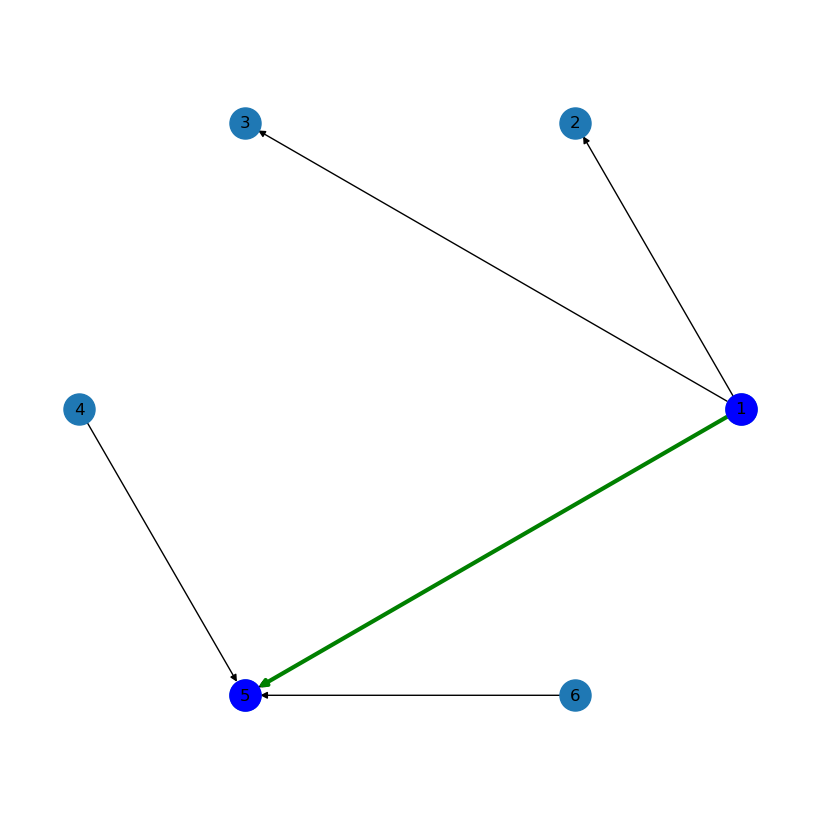

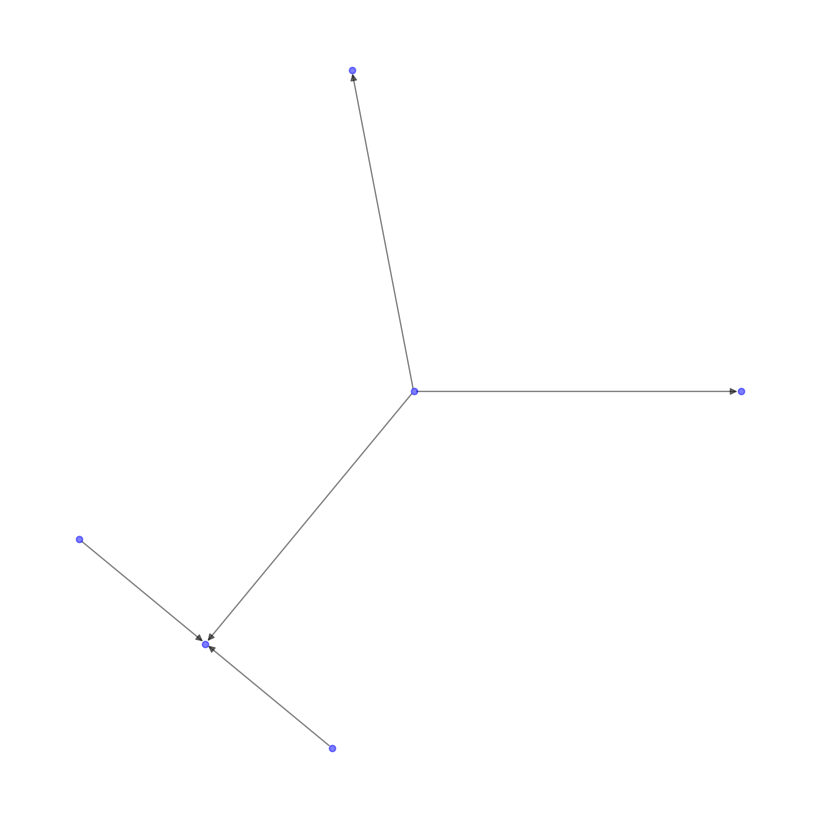

In [17]:
%run DrawGraph.py

##### Optional: Write a 2-dimensional cellular-automata simulator, and implement the game of life. Its transition function is simple. Like the 1-dimensional CA in problem 1, this automaton is also binary with its two states often conceptualized as "alive" and "dead" with values 1 and 0, respectively. The state of each cell at the next iteration is determined by a set of 4 simple rules that you can find in the link above. Implement your CA on a 100x100 grid. Run it through a few hundred iterations from various initial conditions (the more the better). Describe the patterns you observe. Some example patterns have been observed in very large grids and documented. Note: you will not produce a space-time diagram for this, as it would have to be in 3D. Instead, simply show the state of your CA at the end of some of your runs. However, you have to pay attention the state of the CA at each iteration, in order to better observe and describe patterns as they evolve with time. Here's a brief demonstration of how to display a 2D grid using the wxPython library: 2Dcells.py (this displays a randomly-initialized rectangular grid of cells) or you can also use PyCX (https://github.com/hsayama/PyCX)

In [18]:
%run 2Dcells.py 

In [19]:
%run interactive-template.py

##### Here below are other beautiful (useful) examples using PyCX!

In [20]:
%run turing.py

In [21]:
%run hostpathogen.py

In [22]:
%run forestfire.py

In [23]:
%run excitablemedia.py